# The Idea

The SVM learning approach is pretty generic, if 'only' you had the right kernel alsmost every problem may be solved with an svm. In our case it was mostly curiosity of how svms would perform, given some of the default kernels.
The Kernel that outperformed others by far is the 'rbf' kernel, which operates on the distance of the vectors.

A problem that came up is that (at least in this implementation) training the SVM and also using it to classify new instances takes a lot of time. By limiting the maximum number of iterations computations can be made, but the SVM does not converge fast enough if to many training samples are provided. Especially as the classification should quite propably run on a mobile phone this is a big disadvantage of the approach.

# Some startup code

import packages needed & load dataset

In [1]:
import warnings
from sklearn.utils import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from sklearn import svm, datasets, preprocessing
import numpy as np
from loaddata import get_instances_from_csv
from startEvaluation import evaluation
from matplotlib import pyplot as plt
%matplotlib inline



DATAPATH = "../sub_datasets/subset_0.csv"
DATAPATH1 = "../sub_datasets/subset_4.csv"
RANDOM_SEED=42
TRAINROWS = 200000
EVALROWS = 80000

training_data = get_instances_from_csv(DATAPATH, "train", numrows=TRAINROWS)
eval_data = get_instances_from_csv(DATAPATH1,"train", numrows=EVALROWS)
print("training data  : %s rows"%training_data[0].shape[0])
print("evaluation data: %s rows"%eval_data[0].shape[0])

kernels = ['rbf', 'linear', 'sigmoid', 'poly']

scaler = preprocessing.StandardScaler()
scaler.fit(training_data[0])
print(scaler)

def print_prediction(training_data, eval_data, *args, **kwargs):

    svc = svm.SVC(random_state=RANDOM_SEED, cache_size=2000, max_iter=8000, *args, **kwargs).fit(training_data[0], training_data[1])
    print(svc)
    evt = evaluation(training_data[1], svc.predict(training_data[0]))
    a1 = evt.print_only_accuracy()
    eve = evaluation(eval_data[1], svc.predict(eval_data[0]))
    a2 = eve.print_only_accuracy()
    return (a1, a2)


/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


training data  : 199999 rows
evaluation data: 79999 rows
StandardScaler(copy=True, with_mean=True, with_std=True)


10000
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.694469446945
0.654995687446
13335
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.694315284236
0.659370742134
17782
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.695292728193
0.662858285729
23713
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, v

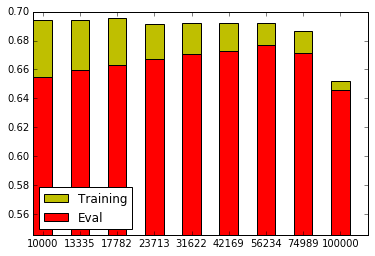

In [2]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(4, 5, 9):
    print(int(num))
    a = print_prediction([training_data[0][1:int(num)],training_data[1][1:int(num)]], eval_data)
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.ylim(ymin=min(plot_data_accuracy1)-0.1)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)

plt.show()

10000
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.251625162516
0.243628045351
13335
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.211264436778
0.206940086751
17782
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.187109836342
0.184714808935
23713
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.00

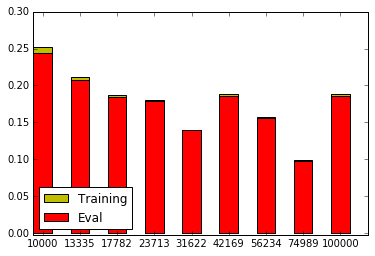

In [3]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for num in np.logspace(4, 5, 9):
    print(int(num))
    a = print_prediction([training_data[0][1:int(num)],training_data[1][1:int(num)]], eval_data, kernel='poly')
    plot_data_num.append(int(num))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")

plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.ylim(ymin=min(plot_data_accuracy1)-0.1)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)

plt.show()

As you can see the maximum accuracy is reached between 30k and 40k samples, as the solver is not able to find a good solution for more samples. As such future computations will be made with 42k samples which is slightly higher than the best performing number. However it is possible that some better parameters are found where the Solver converges better.
Additional benefit: Computation goes much faster. However a method to include more training data might be beneficial.

## Basic SVM
As you can see the print_prediction function fits the SVM-Model to the training data and prints a very simple evaluation.

In [4]:
training_data = get_instances_from_csv(DATAPATH, "train", numrows=74000)
print_prediction(training_data, eval_data)

/usr/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.690441762727
0.676758459481


(0.69044176272652336, 0.67675845948074353)


## Lets use different kernels and see how the perform
Currently there are 3 Kernels implemented by sklearn that we can test. (Of course we could also implement own kernels later on)

In [5]:
for kernel in kernels:
    print(kernel)
    print_prediction(training_data, eval_data, kernel=kernel)

rbf
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.690441762727
0.676758459481
linear
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.154015594805
0.148876860961
sigmoid
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.132312598819
0.133501668771
poly
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=

The RBF kernel seems to perform slightly better then the linear kernel. Both are far better then the polynomial kernel.

## Lets also check, if scaling the data improves the classification performance
Luckily sklearn also provides features for scaling data, the standart scaling function from sklearn scales the data in a way that variance == 1 and mean == 0.

In [6]:
training_data_scaled = [scaler.transform(training_data[0]), training_data[1]]
eval_data_scaled = [scaler.transform(eval_data[0]), eval_data[1]]
for kernel in kernels:
    print(kernel)
    print_prediction(training_data_scaled, eval_data_scaled, kernel=kernel)

rbf
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.659333234233
0.643833047913
linear
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.25061149475
0.24806560082
sigmoid
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='sigmoid',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.132312598819
0.133501668771
poly
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.

## Parameter Variations
For faster computing only the best-performing kernels are used here.

SVC(C=0.01, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.592237732942
0.588319853998
SVC(C=0.037275937203149402, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.610021757051
0.606470080876
SVC(C=0.13894954943731375, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.65040068109
0.643733046663
SVC(C=0.51794746792312096, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrin

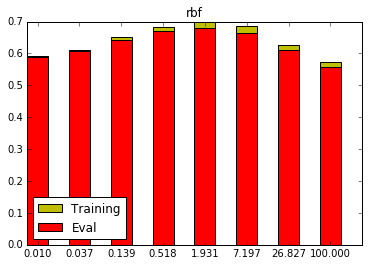

SVC(C=0.01, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.301922998959
0.303478793485
SVC(C=0.037275937203149402, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.267800916229
0.264890811135
SVC(C=0.13894954943731375, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.15466425222
0.153201915024
SVC(C=0.51794746792312096, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, s

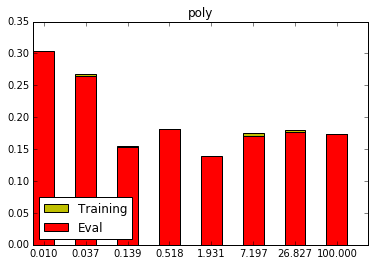

In [7]:
kernels = ['rbf', 'poly']
for kernel in kernels:
    plot_data_num = []
    plot_data_accuracy = []
    plot_data_accuracy1 = []
    for C in np.logspace(-2, 2, num=8):
        a = print_prediction(training_data, eval_data, kernel=kernel, C=C)
        plot_data_num.append("{0:.3f}".format(C))
        plot_data_accuracy.append(a[0])
        plot_data_accuracy1.append(a[1])

    plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
    plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
    plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
    plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
    plt.title(kernel)
    plt.show()

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.417694833714
0.416317703971
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0026826957952797246,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.468019838106
0.467618345229
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0071968567300115215,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.526182786254
0.523631545394
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.019306977288832496,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking

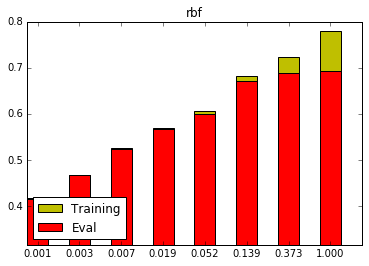

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.283990324194
0.283453543169
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0026826957952797246,
  kernel='poly', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.296422924634
0.294716183952
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0071968567300115215,
  kernel='poly', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.294193164772
0.293516168952
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.019306977288832496,
  kernel='poly', max_iter=8000, probability=False, random_state=42,
  shrin

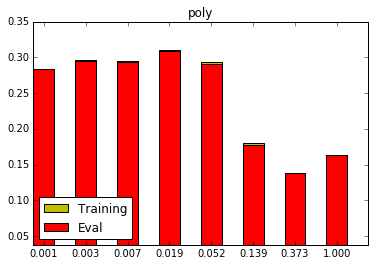

In [8]:

for kernel in ['rbf','poly']:
    plot_data_num = []
    plot_data_accuracy = []
    plot_data_accuracy1 = []
    for gamma in np.logspace(-3, 0, num=8):
        a = print_prediction(training_data, eval_data, kernel=kernel, gamma=gamma)
        plot_data_num.append("{0:.3f}".format(gamma))
        plot_data_accuracy.append(a[0])
        plot_data_accuracy1.append(a[1])

    plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
    plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
    plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
    plt.ylim(ymin=min(plot_data_accuracy1)-0.1)
    plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
    plt.title(kernel)
    plt.show()


In [9]:

for kernel in kernels:
    for decision_function_shape in ['ovo', 'ovr']:
        print_prediction(training_data, eval_data, kernel=kernel, decision_function_shape=decision_function_shape)


SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.690441762727
0.676758459481
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.690441762727
0.676758459481
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.254192624225
0.25470318379
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.254

* ovo and ovr strategies have nearly no impact on classification accuracy

SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=1.0, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.25061149475
0.24806560082
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=1.0, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.120109731213
0.122114026425
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1.0, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.152569629319
0.153776922212
SVC(C=1.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma=1.0, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.124501682455
0.125

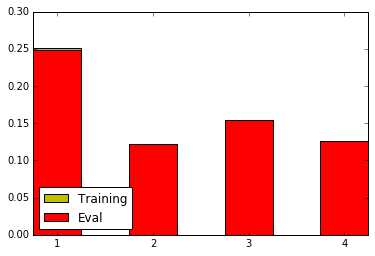

In [10]:

plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for degree in range(1,5):
    a = print_prediction(training_data_scaled, eval_data_scaled, kernel='poly', degree=degree, gamma=1.0)
    plot_data_num.append(degree)
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()

SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=1, gamma=0.3, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.289747158745
0.288391104889
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=2, gamma=0.3, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.336558602143
0.335041688021
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.16524547629
0.165502068776
SVC(C=0.1, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=4, gamma=0.3, kernel='poly',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.157610237976
0.15

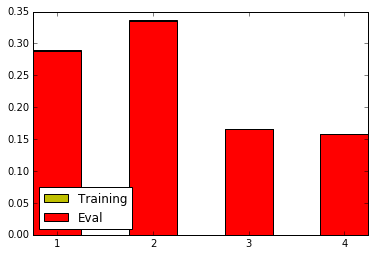

In [11]:

plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for degree in range(1,5):
    a = print_prediction(training_data_scaled, eval_data_scaled, kernel='poly', degree=degree, gamma=0.3, C=0.1)
    plot_data_num.append(degree)
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()

# Lets search for the right combination of gamma and C
## iteratively change C and gamma to improve accuracy

SVC(C=2.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.10000000000000001,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.67286044406
0.660508256353
SVC(C=2.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.20000000000000001,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.706469006338
0.683258540732
SVC(C=2.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.30000000000000004,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)
0.724631413938
0.687608595107
SVC(C=2.0, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.40000000000000002,
  kernel='rbf', max_iter=8000, probability=False, random_state=42,
  s

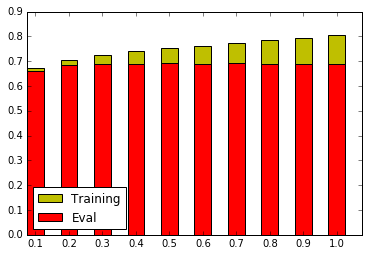

In [12]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for gamma in np.linspace(0.1, 1.0, num=10):
    a = print_prediction(training_data, eval_data, kernel='rbf', gamma=gamma, C=2.0)
    plot_data_num.append("{0:.1f}".format(gamma))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()

SVC(C=0.10000000000000001, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.677346991176
0.662558281979
SVC(C=0.33750000000000002, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.700820281355
0.679820997762
SVC(C=0.57499999999999996, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.707455506155
0.683371042138
SVC(C=0.81249999999999989, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, sh

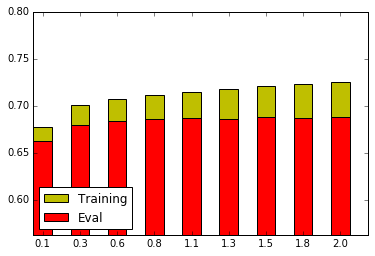

In [15]:
plot_data_num = []
plot_data_accuracy = []
plot_data_accuracy1 = []
for C in np.linspace(0.1, 2.0, num=9):
    a = print_prediction(training_data, eval_data, kernel='rbf', gamma=0.3, C=C)
    plot_data_num.append("{0:.1f}".format(C))
    plot_data_accuracy.append(a[0])
    plot_data_accuracy1.append(a[1])

plot1 =  plt.bar(np.arange(len(plot_data_accuracy)), plot_data_accuracy, width=0.5, color="y")
plot = plt.bar(np.arange(len(plot_data_accuracy1)), plot_data_accuracy1, width=0.5, color="r")
plt.legend((plot1[0], plot[0]), ('Training', 'Eval'), loc=3)
plt.ylim(ymin=min(plot_data_accuracy1)-0.1)
plt.xticks(np.arange(len(plot_data_num))+0.25, plot_data_num)
plt.show()

In [16]:
print_prediction(training_data, eval_data, C=1.05, gamma=0.3)

SVC(C=1.3, cache_size=2000, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.3, kernel='rbf',
  max_iter=8000, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)
0.718171867187
0.686858585732


(0.71817186718739445, 0.68685858573232161)